In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

### Load the experiment and corresponding libraries

In [2]:
project_path = os.path.join(Path.home(), "projects")
sys.path.append(project_path)  # enable import of "bias_transfer_recipes"
os.chdir(os.path.join(project_path,"bias_transfer_recipes/work/"))

In [3]:
from bias_transfer_recipes.bias_transfer_recipes.main import load_experiment
experiment = load_experiment(recipe="_2021_01_28_neurips", 
                             experiment="rep_matching", 
                             schema="",  # schema name will automatically be generated from recipe and experiment names 
                             base_dir=os.path.join(project_path,"bias_transfer_recipes/bias_transfer_recipes/"),
                             import_prefix="bias_transfer_recipes.bias_transfer_recipes.", 
                             dev_mode=True  
                            )

Connecting anix@datajoint-db.mlcloud.uni-tuebingen.de:3306


In [4]:
from bias_transfer.tables.transfer import *
from bias_transfer.tables.nnfabrik import *
schema

Connecting anix@datajoint-db.mlcloud.uni-tuebingen.de:3306


Schema `bias_transfer__2021_01_28_neurips`

In [5]:
schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


In [7]:
# dElete all jobs in error state:
if schema.database != "nnfabrik_core": 
    (schema.jobs & "status='error'").delete()

### Analyse the bias transfer results

In [13]:
from bias_transfer.analysis.results.noise_transfer import NoiseAnalyzer as Analyzer
import seaborn as sns
import pandas as pd

In [14]:
analysis = Analyzer()

In [15]:
analysis.load_data(experiment.transfer_experiments)

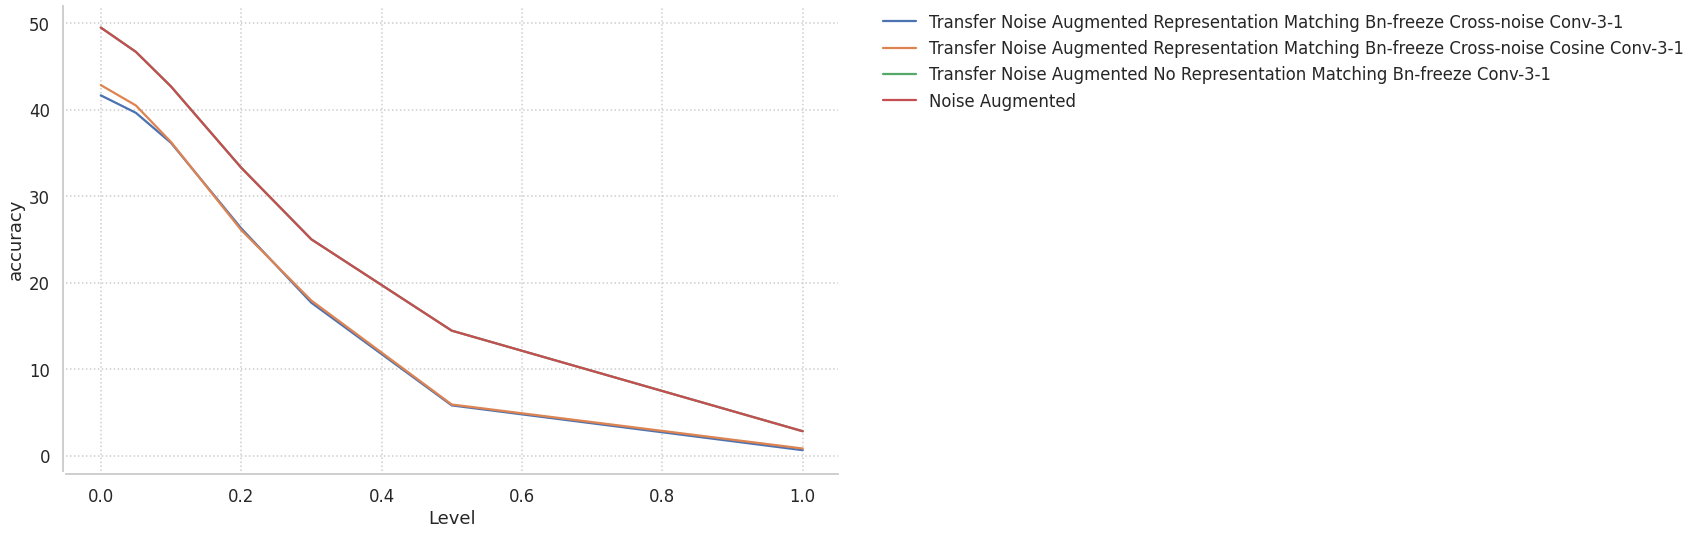

In [16]:
analysis.plot_noise_eval()

In [19]:
analysis.plot_progress_line(to_plot=("Training","RepresentationMatching","loss"),level=0, save="rep_loss")

skipping Transfer noise augmented no representation matching bn-freeze conv-3-1
skipping Noise augmented


In [30]:
%debug

> /usr/local/lib/python3.8/dist-packages/seaborn/_core.py(1112)_attach()
   1110             # its mapping, meaning that it won't handle unshared axes well either.
   1111             for ax in ax_list:
-> 1112                 axis = getattr(ax, f"{var}axis")
   1113                 seed_data = self.plot_data[var]
   1114                 if var_type == "categorical":



ipdb>  q


### Analyse the bias transfer results

In [6]:
from bias_transfer.analysis.results.bias_transfer_benchmark import BiasTransferAnalyzer as Analyzer
import seaborn as sns
import pandas as pd

In [7]:
analysis = Analyzer()

In [8]:
analysis.load_data(experiment.transfer_experiments)

In [17]:
analysis.plot_frontier(ncols=1,nrows=1, columns_range=(4,5), style="beamer_tex", save="translation_hidden", fraction=0.7, tight=False, hide_lines=True)

['Direct Training on Eval', 'Direct Training on Target', 'EWC ', 'FRCL ', 'FROMP ', 'Finetune ', 'Freeze ', 'KnowledgeDistillation ', 'L2-SP ', 'RDL ', 'SynapticIntelligence ']
{'Direct Training on Eval': '#a6cee3', 'Direct Training on Target': '#1f78b4', 'EWC ': '#b2df8a', 'FRCL ': '#33a02c', 'FROMP ': '#fb9a99', 'Finetune ': '#e31a1c', 'Freeze ': '#fdbf6f', 'KnowledgeDistillation ': '#ff7f00', 'L2-SP ': '#cab2d6', 'RDL ': '#6a3d9a', 'SynapticIntelligence ': '#ffff99'}


In [ ]:
df = analysis.generate_table(last_n=2,label_steps=True)

In [ ]:
df

In [15]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]